## SVM Model

In [3]:
# For working with numbers and data
import numpy as np
import pandas as pd

# For making graphs and charts
import seaborn as sns
import matplotlib.pyplot as plt

# For converting text labels to numbers and scaling data
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# For splitting the data into training and testing
from sklearn.model_selection import train_test_split

# Machine learning models
from sklearn.ensemble import RandomForestClassifier     # Random Forest
from sklearn.svm import SVC                             # Support Vector Machine
from sklearn.naive_bayes import GaussianNB              # Naive Bayes
from sklearn.ensemble import StackingClassifier         # Combining models

# For checking model accuracy and performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# For deep learning (neural networks)
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping    # To stop training early if needed

# To ignore warning messages
import warnings
warnings.filterwarnings("ignore")

In [1]:
import numpy as np  # Importing NumPy for loading .npz files

# Load the previously saved train-test split from the .npz file
data = np.load('Dataset/train_test_split.npz')

# Extract the training features
X_train = data['X_train']

# Extract the testing features
X_test = data['X_test']

# Extract the training labels
y_train = data['y_train']

# Extract the testing labels
y_test = data['y_test']


In [4]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create an SVM model (Support Vector Classifier)
svr = SVC()

# Train the model using the training data
svr.fit(X_train, y_train)

# Make predictions on the test data
svr_pred = svr.predict(X_test)

# Evaluate the model
svr_accuracy = accuracy_score(svr_pred, y_test)               # Accuracy
svr_report = classification_report(svr_pred, y_test)          # Detailed classification report
svr_matrix = confusion_matrix(svr_pred, y_test)               # Confusion matrix

# 🖨️ Step 5: Print results
print("✅ Accuracy of SVM:", round(svr_accuracy, 3))
print("\n📋 Classification Report of SVM:\n", svr_report)

✅ Accuracy of SVM: 0.943

📋 Classification Report of SVM:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88     12671
           1       0.95      0.94      0.95     20077
           2       0.92      0.93      0.93     11948
           3       1.00      1.00      1.00     15317

    accuracy                           0.94     60013
   macro avg       0.94      0.94      0.94     60013
weighted avg       0.94      0.94      0.94     60013



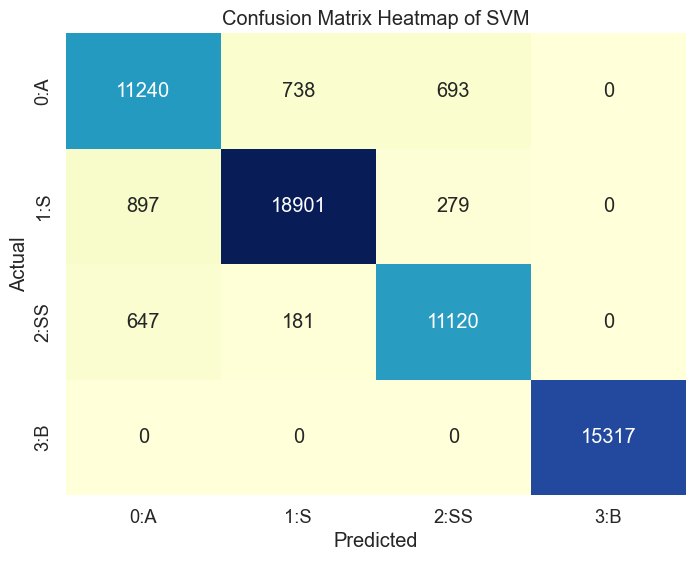

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix for SVM model as a heatmap
plt.figure(figsize=(8, 6))         # Set the size of the plot
sns.set(font_scale=1.2)            # Increase font size for better readability

# Use seaborn to draw the heatmap
sns.heatmap(svr_matrix,            # The confusion matrix for SVM
            annot=True,            # Show the numbers inside the boxes
            fmt="d",               # Format numbers as integers
            cmap="YlGnBu",         # Blue-green color map
            cbar=False,            # Hide the color bar
            xticklabels=["0:A", "1:S", "2:SS", "3:B"],  # X-axis class labels
            yticklabels=["0:A", "1:S", "2:SS", "3:B"])  # Y-axis class labels

# Add labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap of SVM")

# Show the final plot
plt.show()

In [6]:
# FP = Total predicted as a class but were actually something else
false_positives_per_class = svr_matrix.sum(axis=0) - np.diag(svr_matrix)
svr_tfp = false_positives_per_class.sum()

print("\n🚨 False Positives Per Class:")
for i, fp in enumerate(false_positives_per_class):
    print(f"  ➤ Class {i} (Label: {'A' if i==0 else 'S' if i==1 else 'SS' if i==2 else 'B'}): {fp}")

print("\n❗ Total False Positives in Model:", svr_tfp)


🚨 False Positives Per Class:
  ➤ Class 0 (Label: A): 1544
  ➤ Class 1 (Label: S): 919
  ➤ Class 2 (Label: SS): 972
  ➤ Class 3 (Label: B): 0

❗ Total False Positives in Model: 3435


In [7]:
import joblib

# Save the model
joblib.dump(svr, 'Model/svm_model.pkl')

['Model/svm_model.pkl']